In [1]:
import sys
import math
import time
sys.path.insert(0, r'/home/danis/work/python_works/gamma_4/Scripts')
sys.path.insert(0, r'D:\Учеба\Практика\Диплом\gamma_4\Scripts')
import numpy as np
import pandas as pd
from materials import*
import matplotlib.pyplot as plt
from garipov_deconvolution import get_coeff_simpson
from garipov_deconvolution import Gold

Минимальная энергия: 1e-3
windows (w) or linux (l): l


In [38]:
linspace1 = np.linspace(0.035, 0.1, 25, dtype=np.float32)
linspace2 = np.geomspace(0.11, 3, 25, dtype=np.float32)

beams_energyes = []
beams_energyes.extend(linspace1)
beams_energyes.extend(linspace2)

In [43]:
m = 40
target = R(Material(m), 0.01)

brems = [target.brem(beams_energy) for beams_energy in beams_energyes]
brems_e = [brem * en for brem in brems]

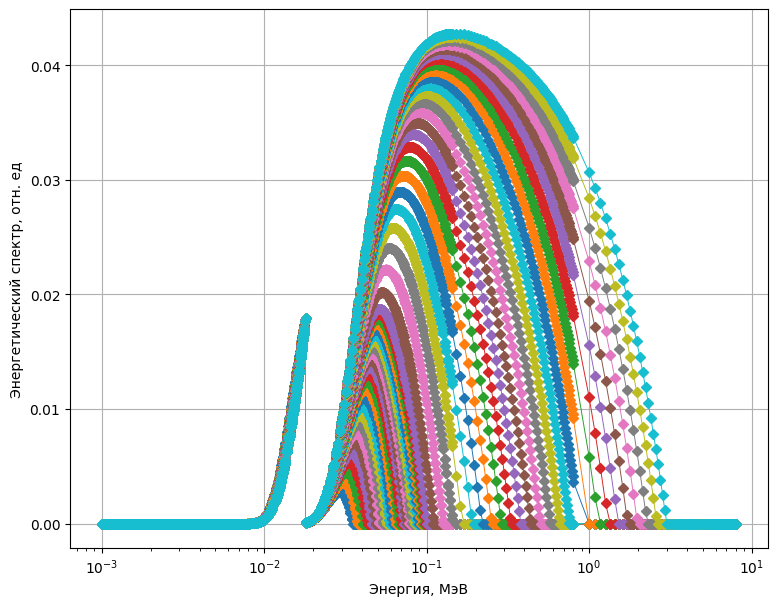

In [54]:
fig, ax = plt.subplots(figsize=(9, 7))

for br in brems_e:
    ax.plot(en, br, ls='-', marker='D', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

In [45]:
n = 11

In [46]:
# Индексы К скачков
EDGE = []
for i in range(1, len(en)):
    if en[i - 1] == en[i]:
        EDGE.append(i - 1)

In [47]:
EDGE.remove(EDGE[EDGE.index(Material(m).k_index())])

Спектральные характеристики чувствительности каналов

In [48]:
def ross_by_k_level(num_1, num_2, level):
    t_2 = Material(num_2).lt(level)
    f_2 = R(Material(num_2), Material(num_2).lt(level)).f()
    t_1 = Material(num_1).lt(R(Material(num_2), Material(num_2).lt(level)).f()[Material(num_1).k_index()])
    f_1 = R(Material(num_1), t_1).f()
    return f_2 - f_1

In [81]:
def signals_from_one_spectrum(spectrum, matrix):
    
    start_time = time.time()
    signals = []
        
    # для каждой строки в матрице
    for row in matrix:
        # значение одного сигнала
        signal = sum(row * np.interp(new_en, en, spectrum))
        signals.append(signal)
        
    return signals

In [112]:
def func_to_optimize(level, spectrum):
    start_time = time.time()
    resp_ross = [ross_by_k_level(i, i+1, level) for i in range(n, 100)]
    
    Matrixs = []
    for response in resp_ross:
        Matrixs.append(get_coeff_simpson(response, en, EDGE)[0])
        
    signals_simpson = signals_from_one_spectrum(spectrum, Matrixs)
    
    sp = [0 for i in range(len(resp_ross))]
    norm = [0 for i in range(len(resp_ross))]
    decb = [0 for i in range(len(resp_ross))]
    dev = [0 for i in range(len(resp_ross))]

    new_en = get_coeff_simpson(resp_ross[0], en, EDGE)[1]
    sp, norm, dev = Gold(Matrixs, signals_simpson, en, spectrum, new_en, 1, 10000, w=True, d=False)[:3]
    print(f'{round((time.time() - start_time), 5)} секунд')
    return dev

In [113]:
from scipy.optimize import minimize

In [ ]:
deviations = []
optimize_levels = []

init_level = 0.3
counter = 1
init_level = 0

for brem in brems_e:
    start = time.time()
    result = minimize(lambda l: func_to_optimize(l, brem), x0=level, bounds=([0.05, 0.8],), method='TNC')
    optimize_levels.append(result.x)
    deviations.append(result.fun)
    print(f'ВЫПОЛНЕНО {counter}  из {len(brems_e)}, время: {round(time.time()-start, 6)} секунд')
    counter += 1

7.42402 секунд
7.42755 секунд
7.46189 секунд
7.4726 секунд
7.43976 секунд
7.47679 секунд
7.45315 секунд
7.47999 секунд
7.46731 секунд
7.61471 секунд
7.42448 секунд
7.48016 секунд
7.12406 секунд
7.13403 секунд
7.30358 секунд
7.27429 секунд
7.25979 секунд
7.2528 секунд
7.22414 секунд
7.28422 секунд
7.23961 секунд
7.20471 секунд
7.18825 секунд
7.19071 секунд
7.18085 секунд
7.35966 секунд
7.60027 секунд
7.17228 секунд
7.19186 секунд
7.24137 секунд
7.376 секунд
7.23588 секунд
7.24335 секунд
7.20451 секунд
8.41951 секунд
7.17641 секунд
7.18479 секунд
7.16963 секунд
7.14026 секунд
7.16187 секунд
7.16827 секунд
7.16897 секунд
7.2267 секунд
7.17582 секунд
7.19287 секунд
8.08845 секунд
7.25694 секунд
7.20952 секунд
7.2677 секунд
7.20375 секунд
ВЫПОЛНЕНО 1  из 50, время: 366.540196 секунд
7.47769 секунд
7.45806 секунд
7.48275 секунд
7.48223 секунд
7.34741 секунд
7.39469 секунд
7.17199 секунд
7.16275 секунд
7.37675 секунд
7.26196 секунд
7.2191 секунд
7.1785 секунд
7.16112 секунд
7.1725 секунд
7.32

7.27741 секунд
8.1018 секунд
7.48118 секунд
7.74114 секунд
7.87539 секунд
7.39985 секунд
7.91263 секунд
7.51747 секунд
8.48171 секунд
7.43698 секунд
7.21334 секунд
7.19897 секунд
7.1971 секунд
7.35862 секунд
7.22798 секунд
7.2015 секунд
7.17674 секунд
7.22558 секунд
7.18361 секунд
7.16506 секунд
ВЫПОЛНЕНО 10  из 50, время: 883.821019 секунд
7.43899 секунд
7.42385 секунд
7.45144 секунд
7.44448 секунд
7.45883 секунд
7.43934 секунд
7.4863 секунд
7.45593 секунд
7.43751 секунд
7.43836 секунд
7.25317 секунд
7.14131 секунд
7.21469 секунд
7.17165 секунд
7.26844 секунд
7.28312 секунд
7.23994 секунд
7.23686 секунд
7.23698 секунд
7.22486 секунд
7.24679 секунд
7.26744 секунд
7.29547 секунд
7.26719 секунд
7.26202 секунд
7.2346 секунд
7.36373 секунд
7.23859 секунд
7.23126 секунд
7.23512 секунд
7.64296 секунд
7.68576 секунд
7.47987 секунд
7.49338 секунд
7.45073 секунд
8.32798 секунд
7.82783 секунд
7.41396 секунд
7.47324 секунд
7.36082 секунд
7.32432 секунд
7.35236 секунд
7.38314 секунд
7.24216 секунд

7.33166 секунд
7.21205 секунд
7.22514 секунд
8.06584 секунд
7.44396 секунд
7.28051 секунд
7.24567 секунд
7.27878 секунд
7.2186 секунд
7.21665 секунд
7.23425 секунд
7.22991 секунд
7.22571 секунд
7.19357 секунд
7.25088 секунд
7.23334 секунд
7.25799 секунд
7.21779 секунд
7.26207 секунд
7.22215 секунд
7.21202 секунд
7.29856 секунд
7.24467 секунд
7.24255 секунд
7.21985 секунд
7.28593 секунд
7.24505 секунд
7.26276 секунд
7.2729 секунд
7.28194 секунд
7.27976 секунд
7.27895 секунд
7.26525 секунд
7.26156 секунд
7.2551 секунд
7.26414 секунд
7.2402 секунд
7.31846 секунд
7.28095 секунд
7.27514 секунд
ВЫПОЛНЕНО 22  из 50, время: 802.405051 секунд
7.50244 секунд
7.46414 секунд
7.48236 секунд
7.45151 секунд
7.44732 секунд
7.46654 секунд
7.46071 секунд
7.44872 секунд
7.4497 секунд
7.50188 секунд
7.17839 секунд
7.24818 секунд
7.65056 секунд
7.65415 секунд
7.6475 секунд
7.60834 секунд
7.28585 секунд
7.30118 секунд
7.21892 секунд
7.26659 секунд
7.20312 секунд
7.23921 секунд
7.2422 секунд
7.27347 секунд
7

In [101]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

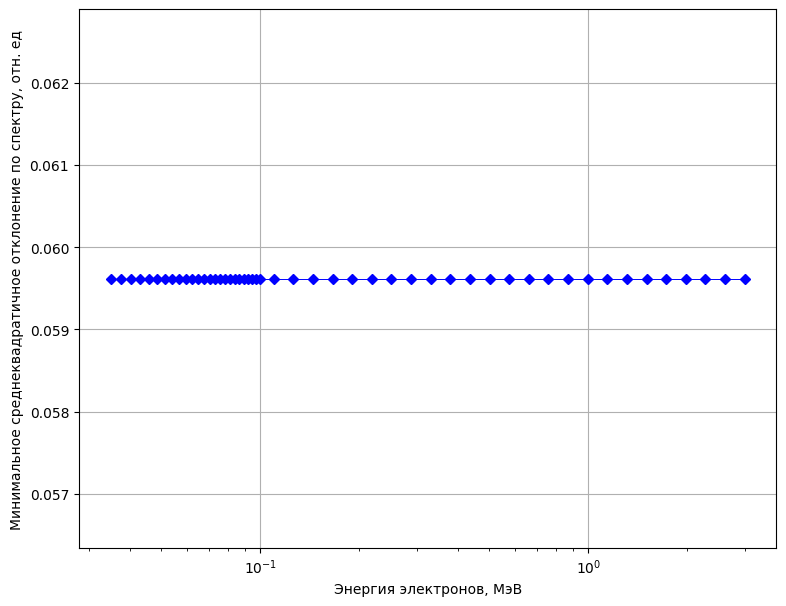

In [61]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(beams_energyes, deviations, ls='-', marker='D', lw='0.7', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия электронов, МэВ', fontsize=10)
ax.set_ylabel('Минимальное среднеквадратичное отклонение по спектру, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.grid(True)

# fig.savefig('Фильтры_Росса_минимум_ошибки_восстановления_от_энергии_электронов.jpg', bbox_inches='tight')

In [28]:
resp_ross = [ross_by_k_level(i, i+1, result.x) for i in range(n, 100)]

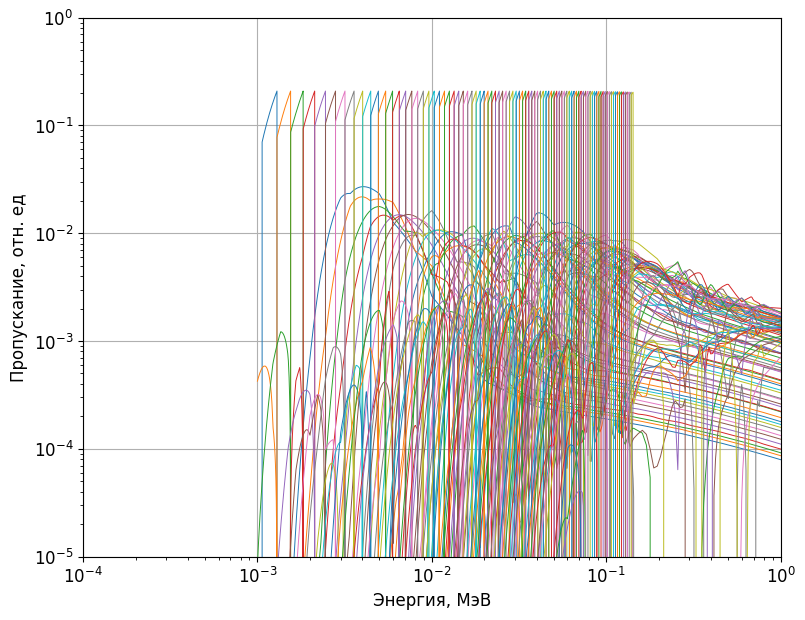

In [29]:
fig, ax = plt.subplots(figsize=(9, 7))

for i in resp_ross:
    ax.plot(en, i, ls='-', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Пропускание, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-4, 1e0)
ax.set_ylim(1e-5, 1e0)
ax.grid(True)

Сигналы детекторов

In [30]:
signals_simpson = []

for response in resp_ross:
    signals_simpson.append(sum(get_coeff_simpson(response*brem_e, en, EDGE)[0]))

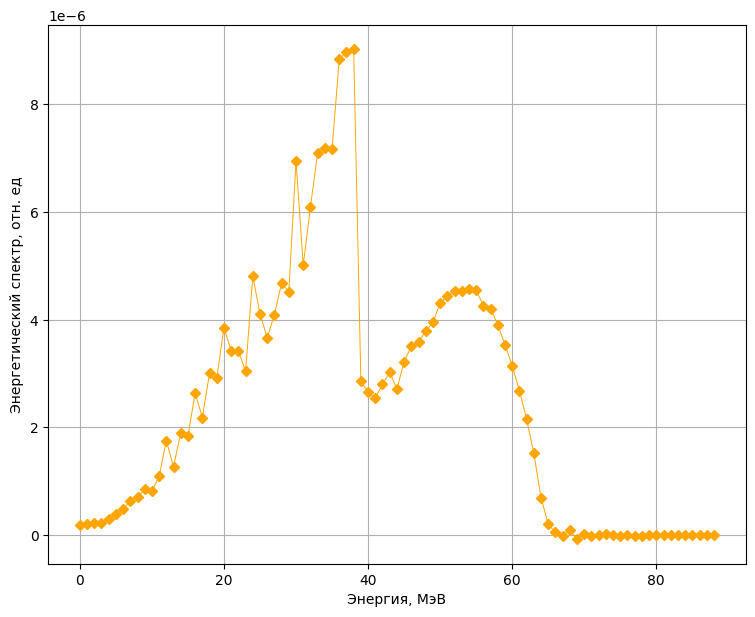

In [31]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(list(range(len(signals_simpson))), signals_simpson, ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1.e-5, 0.3e-4)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

Матрица задачи

In [32]:
Matrixs = []

for response in resp_ross:
    Matrixs.append(get_coeff_simpson(response, en, EDGE)[0])

In [33]:
sp = [0 for i in range(len(signals_simpson))]
norm = [0 for i in range(len(signals_simpson))]
decb = [0 for i in range(len(signals_simpson))]
dev = [0 for i in range(len(signals_simpson))]

new_en = get_coeff_simpson(resp_ross[0], en, EDGE)[1]

In [34]:
import time

start_time = time.time()
sp, norm, dev = Gold(Matrixs, signals_simpson, en, brem_e, new_en, 1, 20000, w=True, d=False)[:3]
print(f'время: {time.time() - start_time}, секунд')

время: 5.061600208282471, секунд


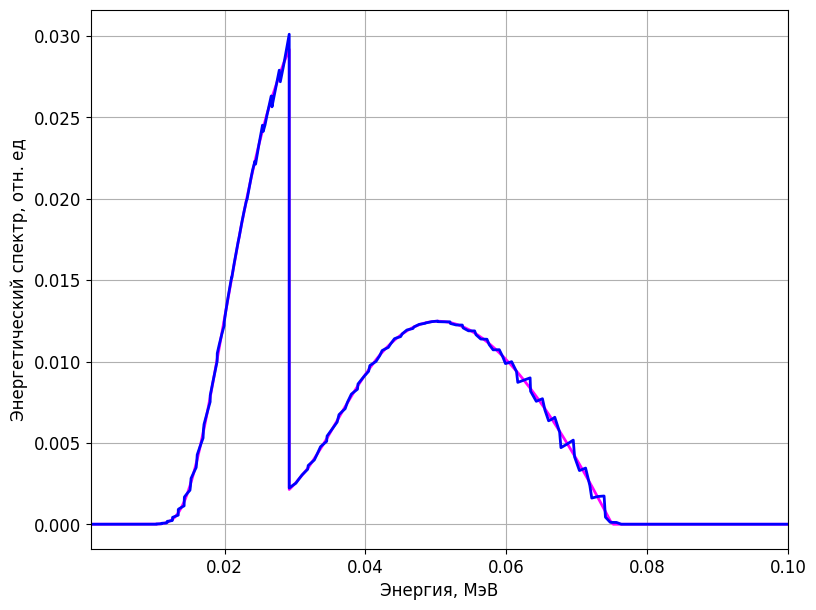

In [35]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(en, brem_e, ls='-', lw='2', ms=5, color='magenta')
ax.plot(new_en, sp, ls='-', lw='2', ms=5, color='blue')


# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

In [36]:
dev

0.019540258442727564